In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv


In [66]:
covid_data_file1 = '../data/race_data_tracker.csv'
covid_tracker_df = pd.read_csv(covid_data_file1, dtype="object", encoding="utf-8")
# covid_tracker_df.shape
covid_tracker_df.head(25)

,Date,State,Cases_Total,Cases_White,Cases_Black,Cases_LatinX,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,...,Deaths_LatinX,Deaths_Asian,Deaths_AIAN,Deaths_NHPI,Deaths_Multiracial,Deaths_Other,Deaths_Unknown,Deaths_Ethnicity_Hispanic,Deaths_Ethnicity_NonHispanic,Deaths_Ethnicity_Unknown
0,20200722,AK,2132,750,49,0,67,282,76,61,...,0,2,4,1,0,0,1,0,18,1
1,20200722,AL,71813,22694,20884,0,267,0,0,0,...,0,4,0,0,0,27,100,45,1126,193
2,20200722,AR,35246,17406,7521,0,498,101,1985,0,...,0,6,0,30,0,27,3,41,336,3
3,20200722,AS,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20200722,AZ,150609,24130,3246,34645,1096,9085,0,0,...,786,32,394,0,0,53,495,786,1693,495
5,20200722,CA,413576,46562,11396,146903,14920,587,1590,1967,...,3455,1008,27,41,41,93,198,3455,4217,198
6,20200722,CO,41698,12771,1874,13897,840,204,127,381,...,361,53,11,5,20,6,53,361,1224,53
7,20200722,CT,48223,17226,6375,9249,695,44,0,143,...,380,48,2,0,32,21,42,380,3984,42
8,20200722,DC,11529,2343,5637,0,178,27,30,0,...,76,8,0,0,0,6,0,76,504,0
9,20200722,DE,13792,4584,3529,3605,192,0,0,0,...,35,1,0,0,0,6,23,35,469,23


In [3]:
type(covid_tracker_df['Cases_Total'][0])

str

In [4]:
check_for_nan = covid_tracker_df['Cases_Total'].isnull().values.any()
print (check_for_nan)

False


In [5]:
type(covid_tracker_df['Cases_Total'][0])

str

In [6]:
#covid_tracker_df = covid_tracker_df.apply (pd.to_numeric, errors='coerce')

In [7]:
covid_tracker_df['Cases_Total']=covid_tracker_df['Cases_Total'].astype(int)
covid_tracker_df['Cases_White'] = covid_tracker_df['Cases_White'].astype(int)
covid_tracker_df['Cases_Black'] = covid_tracker_df['Cases_Black'].astype(int)
covid_tracker_df['Cases_LatinX'] = covid_tracker_df['Cases_LatinX'].astype(int)
covid_tracker_df['Cases_Asian'] = covid_tracker_df['Cases_Asian'].astype(int)
covid_tracker_df['Cases_AIAN'] = covid_tracker_df['Cases_AIAN'].astype(int)
covid_tracker_df['Cases_NHPI'] = covid_tracker_df['Cases_NHPI'].astype(int)
covid_tracker_df['Cases_Multiracial'] = covid_tracker_df['Cases_Multiracial'].astype(int)
covid_tracker_df['Cases_Other'] = covid_tracker_df['Cases_Other'].astype(int)
covid_tracker_df['Cases_Unknown'] = covid_tracker_df['Cases_Unknown'].astype(int)
covid_tracker_df['Cases_Ethnicity_Hispanic'] = covid_tracker_df['Cases_Ethnicity_Hispanic'].astype(int)
covid_tracker_df['Cases_Ethnicity_NonHispanic'] = covid_tracker_df['Cases_Ethnicity_NonHispanic'].astype(int)
covid_tracker_df['Cases_Ethnicity_Unknown'] = covid_tracker_df['Cases_Ethnicity_Unknown'].astype(int)
covid_tracker_df['Deaths_Total'] = covid_tracker_df['Deaths_Total'].astype(int)
covid_tracker_df['Deaths_White'] = covid_tracker_df['Deaths_White'].astype(int)
covid_tracker_df['Deaths_Black'] = covid_tracker_df['Deaths_Black'].astype(int)
covid_tracker_df['Deaths_LatinX'] = covid_tracker_df['Deaths_LatinX'].astype(int)
covid_tracker_df['Deaths_Asian'] = covid_tracker_df['Deaths_Asian'].astype(int)
covid_tracker_df['Deaths_AIAN'] = covid_tracker_df['Deaths_AIAN'].astype(int)
covid_tracker_df['Deaths_NHPI'] = covid_tracker_df['Deaths_NHPI'].astype(int)
covid_tracker_df['Deaths_Multiracial'] = covid_tracker_df['Deaths_Multiracial'].astype(int)
covid_tracker_df['Deaths_Other'] = covid_tracker_df['Deaths_Other'].astype(int)
covid_tracker_df['Deaths_Unknown'] = covid_tracker_df['Deaths_Unknown'].astype(int)
covid_tracker_df['Deaths_Ethnicity_Hispanic'] = covid_tracker_df['Deaths_Ethnicity_Hispanic'].astype(int)
covid_tracker_df['Deaths_Ethnicity_NonHispanic'] = covid_tracker_df['Deaths_Ethnicity_NonHispanic'].astype(int)
covid_tracker_df['Deaths_Ethnicity_Unknown'] = covid_tracker_df['Deaths_Ethnicity_Unknown'].astype(int)


In [8]:
type(covid_tracker_df['Cases_Total'][0])

numpy.int64

In [9]:
covid_tracker_df.columns

Index(['Date', 'State', 'Cases_Total', 'Cases_White', 'Cases_Black',
       'Cases_LatinX', 'Cases_Asian', 'Cases_AIAN', 'Cases_NHPI',
       'Cases_Multiracial', 'Cases_Other', 'Cases_Unknown',
       'Cases_Ethnicity_Hispanic', 'Cases_Ethnicity_NonHispanic',
       'Cases_Ethnicity_Unknown', 'Deaths_Total', 'Deaths_White',
       'Deaths_Black', 'Deaths_LatinX', 'Deaths_Asian', 'Deaths_AIAN',
       'Deaths_NHPI', 'Deaths_Multiracial', 'Deaths_Other', 'Deaths_Unknown',
       'Deaths_Ethnicity_Hispanic', 'Deaths_Ethnicity_NonHispanic',
       'Deaths_Ethnicity_Unknown'],
      dtype='object')

In [10]:
cases_tot = covid_tracker_df['Cases_Total'].sum()
cases_white_tot = covid_tracker_df['Cases_White'].sum()
cases_black_tot = covid_tracker_df['Cases_Black'].sum() 
cases_latinx_tot = covid_tracker_df['Cases_LatinX'].sum()
cases_asian_tot = covid_tracker_df['Cases_Asian'].sum()
cases_aian_tot = covid_tracker_df['Cases_AIAN'].sum()
cases_nhpi_tot = covid_tracker_df['Cases_NHPI'].sum()
cases_ethn_hisp_tot = covid_tracker_df['Cases_Ethnicity_Hispanic'].sum()
cases_latin_hisp_tot = cases_latinx_tot + cases_ethn_hisp_tot

deaths_tot = covid_tracker_df['Deaths_Total'].sum()
deaths_white_tot = covid_tracker_df['Deaths_White'].sum()
deaths_black_tot = covid_tracker_df['Deaths_Black'].sum()
deaths_latinx_tot = covid_tracker_df['Deaths_LatinX'].sum()
deaths_asian_tot = covid_tracker_df['Deaths_Asian'].sum()
deaths_aian_tot = covid_tracker_df['Deaths_AIAN'].sum()
deaths_nhpi_tot = covid_tracker_df['Deaths_NHPI'].sum()
deaths_ethn_hisp_tot = covid_tracker_df['Deaths_Ethnicity_Hispanic'].sum()


deaths_latin_hisp_tot = deaths_latinx_tot + deaths_ethn_hisp_tot

In [11]:
print(f'cases_tot: {cases_tot}') 
print(f'cases_white_tot: {cases_white_tot}') 
print(f'cases_black_tot: {cases_black_tot}') 
#print(cases_latinx_tot)
print(f'cases_asian_tot: {cases_asian_tot}') 
print(f'cases_aian_tot: {cases_aian_tot}') 
print(f'cases_nhpi_tot: {cases_nhpi_tot}') 
#print(cases_ethn_hisp_tot) 
print(f'cases_latin_hisp_tot:{cases_latin_hisp_tot}')
print(f'deaths_tot: {deaths_tot}') 
print(f'deaths_white_tot: {deaths_white_tot}') 
print(f'deaths_black_tot: {deaths_black_tot}') 
print(f'deaths_latinx_tot: {deaths_latinx_tot}') 
print(f'deaths_asian_tot: {deaths_asian_tot}') 
print(f'deaths_aian_tot: {deaths_aian_tot}')
print(f'deaths_nhpi_tot: {deaths_nhpi_tot}')
print(f'deaths_latin_hisp_tot: {deaths_latin_hisp_tot}')

cases_tot: 54734966
cases_white_tot: 12302531
cases_black_tot: 6496690
cases_asian_tot: 1036161
cases_aian_tot: 380520
cases_nhpi_tot: 105961
cases_latin_hisp_tot:16384435
deaths_tot: 2717177
deaths_white_tot: 1265201
deaths_black_tot: 582396
deaths_latinx_tot: 357693
deaths_asian_tot: 103827
deaths_aian_tot: 13956
deaths_nhpi_tot: 2269
deaths_latin_hisp_tot: 730475


In [12]:
covid_tracker_df.head(5)

,Date,State,Cases_Total,Cases_White,Cases_Black,Cases_LatinX,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,...,Deaths_LatinX,Deaths_Asian,Deaths_AIAN,Deaths_NHPI,Deaths_Multiracial,Deaths_Other,Deaths_Unknown,Deaths_Ethnicity_Hispanic,Deaths_Ethnicity_NonHispanic,Deaths_Ethnicity_Unknown
0,20200722,AK,2132,750,49,0,67,282,76,61,...,0,2,4,1,0,0,1,0,18,1
1,20200722,AL,71813,22694,20884,0,267,0,0,0,...,0,4,0,0,0,27,100,45,1126,193
2,20200722,AR,35246,17406,7521,0,498,101,1985,0,...,0,6,0,30,0,27,3,41,336,3
3,20200722,AS,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20200722,AZ,150609,24130,3246,34645,1096,9085,0,0,...,786,32,394,0,0,53,495,786,1693,495


In [13]:
#ethn_case_summary = pd.DataFrame({'Cases White': [cases_white_tot],
#                                  'Cases Black': [cases_black_tot],
#                                  'Cases Asian': [cases_asian_tot],
#                                  'Cases Latin/Hispanic': [cases_latin_hisp_tot],
#                                  'Cases_aian_tot': [cases_aian_tot],
#                                  'Cases nhpi_tot': [cases_nhpi_tot]})
#
#ethn_death_summary = pd.DataFrame({'Death Total': [deaths_tot],
#                                   'Death White': [deaths_white_tot],
#                                   'Death Black': [deaths_black_tot],
#                                   'Death Asian': [deaths_asian_tot],
#                                   'Death Latin/Hispanic': [deaths_latin_hisp_tot],
#                                   'Death aian_tot': [deaths_aian_tot],
#                                   'Death nhpi_tot': [deaths_nhpi_tot]})                           

In [14]:
ethn_case_summary = pd.DataFrame({'Ethnicity/Race': ['White','Black','Asian','Latin/Hispanic','Native American','Asian Pacific'],
                           'Cases': [cases_white_tot,cases_black_tot,cases_asian_tot,cases_latin_hisp_tot,cases_aian_tot,\
                                           cases_nhpi_tot]})
ethn_case_summary

,Ethnicity/Race,Cases
0,White,12302531
1,Black,6496690
2,Asian,1036161
3,Latin/Hispanic,16384435
4,Native American,380520
5,Asian Pacific,105961


In [15]:
ethn_death_summary = pd.DataFrame({'Ethnicity/Race': ['White','Black','Asian','Latin/Hispanic','Native American','Asian Pacific'],
                           'Death Cases': [deaths_white_tot,deaths_black_tot,deaths_asian_tot,deaths_latin_hisp_tot,\
                                           deaths_aian_tot, deaths_nhpi_tot]})
ethn_death_summary

,Ethnicity/Race,Death Cases
0,White,1265201
1,Black,582396
2,Asian,103827
3,Latin/Hispanic,730475
4,Native American,13956
5,Asian Pacific,2269


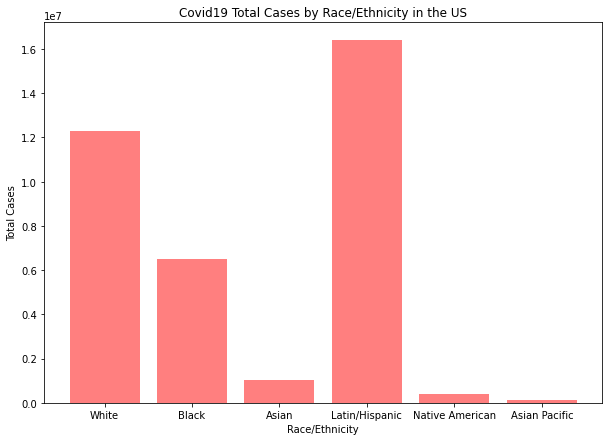

In [169]:
x_axis = np.arange(len(ethn_case_summary))
plt.figure(figsize=(10,7))
plt.bar(x_axis, ethn_case_summary["Cases"], color='r',alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,ethn_case_summary["Ethnicity/Race"])
# Give our chart some labels and a tile
plt.title("Covid19 Total Cases by Race/Ethnicity in the US")
plt.xlabel("Race/Ethnicity")
plt.ylabel("Total Cases")

plt.savefig("../Images/ethnicity_case_chart.png")
plt.show()

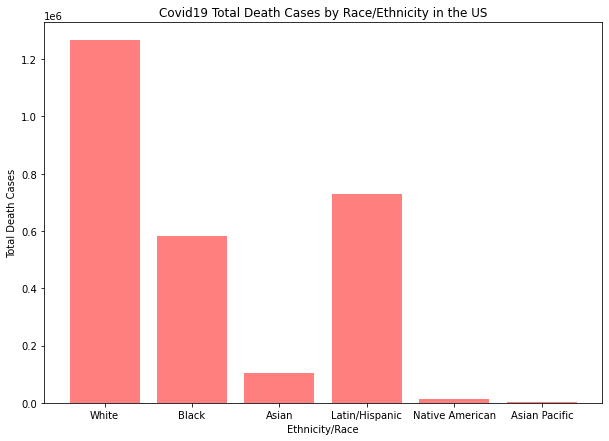

In [170]:
x_axis = np.arange(len(ethn_death_summary))
plt.figure(figsize=(10,7))
plt.bar(x_axis, ethn_death_summary["Death Cases"], color='r',alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,ethn_death_summary["Ethnicity/Race"])
# Give our chart some labels and a tile
plt.title("Covid19 Total Death Cases by Race/Ethnicity in the US")
plt.xlabel("Ethnicity/Race")
plt.ylabel("Total Death Cases")
#plt.xlim(-0.75, len(x_axis)-0.25)
plt.savefig("../Images/ethnicity_death_chart.png")
plt.show()

In [171]:

#temperature_df = pd.read_csv('../Resources/lax_temperature.csv')
#temperatures = temperature_df['HourlyDryBulbTemperature']
#fig1, ax1 = plt.subplots()
#ax1.set_title('Temperatures at LAX')
#ax1.set_ylabel('Temperature (°F)')
#ax1.boxplot(temperatures)
#plt.show()

ethn_death_summary.describe

<bound method NDFrame.describe of     Ethnicity/Race  Death Cases
0            White      1265201
1            Black       582396
2            Asian       103827
3   Latin/Hispanic       730475
4  Native American        13956
5    Asian Pacific         2269>

In [172]:
ethn_death_summary.head()

,Ethnicity/Race,Death Cases
0,White,1265201
1,Black,582396
2,Asian,103827
3,Latin/Hispanic,730475
4,Native American,13956


In [173]:
#set the data frame column name to be keys
race_dict = ethn_case_summary.to_dict()
tot_cases_list = list(race_dict['Cases'].values())
race_list = list(race_dict['Ethnicity/Race'].values())


In [174]:
print(race_list)
print(tot_cases_list)

['White', 'Black', 'Asian', 'Latin/Hispanic', 'Native American', 'Asian Pacific']
[12302531, 6496690, 1036161, 16384435, 380520, 105961]


In [175]:
colors = ["yellowgreen","lightblue","orange","red","purple","yellow"]
#explode = (0.1,0,0,0,0,0,0,0,0,0)

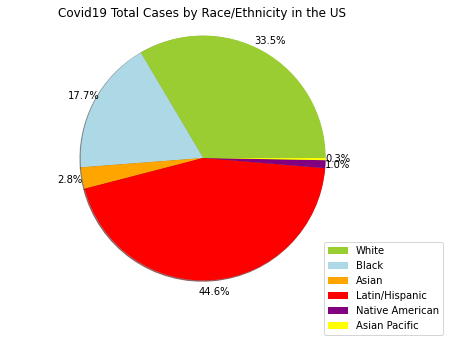

In [176]:
# Tell matplotlib to create a pie chart based upon the above data
#plt.pie(tot_cases_list, labels=race_list, colors=colors,
#        autopct="%1.1f%%", shadow=True, startangle=140)
plt.figure(figsize=(7,5))
plt.pie(tot_cases_list, colors=colors,pctdistance=1.1, labeldistance=1.4,
        autopct="%1.1f%%",startangle=0,shadow=True, radius=3)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title('Covid19 Total Cases by Race/Ethnicity in the US' )
plt.legend(race_list, bbox_to_anchor=(1,0),loc='lower right',
                      bbox_transform=plt.gcf().transFigure)
 
# Save an image of our chart and print the final product to the screen
plt.savefig("../Images/TotCasesVsRaceEthnicity.png")
plt.show()